# Problem Statements, hackHub

##ML and AI

### Extent and damage of earthquake

---


# **PHASE 1**

*Import all the packages here*

In [0]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from time import time

import tensorflow as tf


*Upload the csv files to the colab*

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


*Import the datasets into the notebook*

In [0]:
df1 = pd.read_csv('gdrive/My Drive/Colab Notebooks/Dataset/train.csv')
df2 = pd.read_csv('gdrive/My Drive/Colab Notebooks/Dataset/Building_Structure.csv')
df3 =pd.read_csv('gdrive/My Drive/Colab Notebooks/Dataset/Building_Ownership_Use.csv')
df4_test =pd.read_csv('gdrive/My Drive/Colab Notebooks/Dataset/test.csv')

*Define a function for finding the common columns in two datasets*

In [0]:
def common_member(a, b): 
      
    a_set = set(a) 
    b_set = set(b) 
      
    # check length  
    if len(a_set.intersection(b_set)) > 0:
        return(a_set.intersection(b_set))   
    else: 
        return("no common elements") 

*testing Random forests on the df1 by splitting it into train and test*

In [0]:
df_train=df1
y=df1.damage_grade
del(df_train['damage_grade'])
del(df_train['area_assesed'])
del(df_train['building_id'])
del(df_train['district_id'])
del(df_train['has_repair_started'])
del(df_train["vdcmun_id"])
x=df_train

x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25)
clf=RandomForestClassifier()
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.33405512184929814

# Phase 1.2

*Import the data sets here and merge the extra datasets given with the train dataset and the test dataset with respect to the buildings id*

In [0]:
df_train = pd.read_csv('gdrive/My Drive/Colab Notebooks/Dataset/train.csv')
df_train2 = pd.read_csv('gdrive/My Drive/Colab Notebooks/Dataset/Building_Ownership_Use.csv')
df_train3 = pd.read_csv('gdrive/My Drive/Colab Notebooks/Dataset/Building_Structure.csv')

del(df_train['area_assesed'])
# del(df_train['building_id'])
del(df_train['district_id'])
del(df_train['has_repair_started'])
del(df_train["vdcmun_id"])
df_train=pd.merge(df_train, df_train2, on='building_id')
df_train=pd.merge(df_train, df_train3, on='building_id')
del(df_train['building_id'])

*Seeing the head of the output train variable*

In [0]:
df_train['damage_grade'].head()

0    Grade 4
1    Grade 2
2    Grade 1
3    Grade 5
4    Grade 3
Name: damage_grade, dtype: object

*import the test dataset and join the extra datasets' columns to the test dataset having the building ID as the primary variable*

*splitting the train data into train and output variable to split it further*

In [0]:
df_train=df_train.dropna()
y=df_train.damage_grade
df_train=df_train.select_dtypes([np.number])
x=df_train

*split the train data into train and validation dataset with the test size as 25%*

#### Train the data using the Extra trees classifier and test it on the validation data

In [0]:

x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25)
clf=ExtraTreesClassifier()
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

accuracy_score(y_test, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.688615930100038

# PHASE 2

*import the data sets into the colab *

In [0]:
df_train = pd.read_csv('gdrive/My Drive/Colab Notebooks/Dataset/train.csv')
df_train2 = pd.read_csv('gdrive/My Drive/Colab Notebooks/Dataset/Building_Ownership_Use.csv')
df_train3 = pd.read_csv('gdrive/My Drive/Colab Notebooks/Dataset/Building_Structure.csv')

del(df_train['area_assesed'])
# del(df_train['building_id'])
del(df_train['district_id'])
del(df_train['has_repair_started'])
del(df_train["vdcmun_id"])
df_train=pd.merge(df_train, df_train2, on='building_id')
df_train=pd.merge(df_train, df_train3, on='building_id')
del(df_train['building_id'])

In [291]:
df_train.head()

,damage_grade,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,district_id_x,...,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq
0,Grade 4,0.0,0,0,0,0,0,0,0,24,...,0,0,0,0,0,0,0,0,0,Damaged-Not used
1,Grade 2,0.0,0,0,0,0,0,0,0,44,...,0,0,1,0,0,0,0,0,0,Damaged-Repaired and used
2,Grade 1,0.0,0,0,0,0,0,0,0,36,...,0,0,0,0,0,0,0,1,0,Not damaged
3,Grade 5,0.0,0,0,0,0,0,0,0,30,...,0,0,0,0,0,0,0,0,0,Damaged-Rubble clear
4,Grade 3,0.0,0,0,0,0,0,0,0,36,...,0,0,0,0,0,0,0,0,0,Damaged-Used in risk


*label Encoding the variables*

In [0]:
df_train=df_train.apply(LabelEncoder().fit_transform)

In [0]:
remove=['vdcmun_id_x', 'ward_id_x', 'district_id_y', 'vdcmun_id_y', 'ward_id_y']
for i in remove:
  del(df_train[i])

*Corrrelation between the value Y and the rest of the variables*

In [294]:
df_train.corr()['damage_grade']

damage_grade                              1.000000
has_geotechnical_risk                     0.086293
has_geotechnical_risk_fault_crack         0.098152
has_geotechnical_risk_flood              -0.021316
has_geotechnical_risk_land_settlement     0.057551
has_geotechnical_risk_landslide           0.063065
has_geotechnical_risk_liquefaction        0.001484
has_geotechnical_risk_other              -0.002173
has_geotechnical_risk_rock_fall           0.058279
district_id_x                            -0.102444
legal_ownership_status                   -0.081362
count_families                            0.066395
has_secondary_use                        -0.082237
has_secondary_use_agriculture             0.026161
has_secondary_use_hotel                  -0.112932
has_secondary_use_rental                 -0.095129
has_secondary_use_institution            -0.034927
has_secondary_use_school                 -0.018036
has_secondary_use_industry               -0.010701
has_secondary_use_health_post  

*The Heat map is plotted*

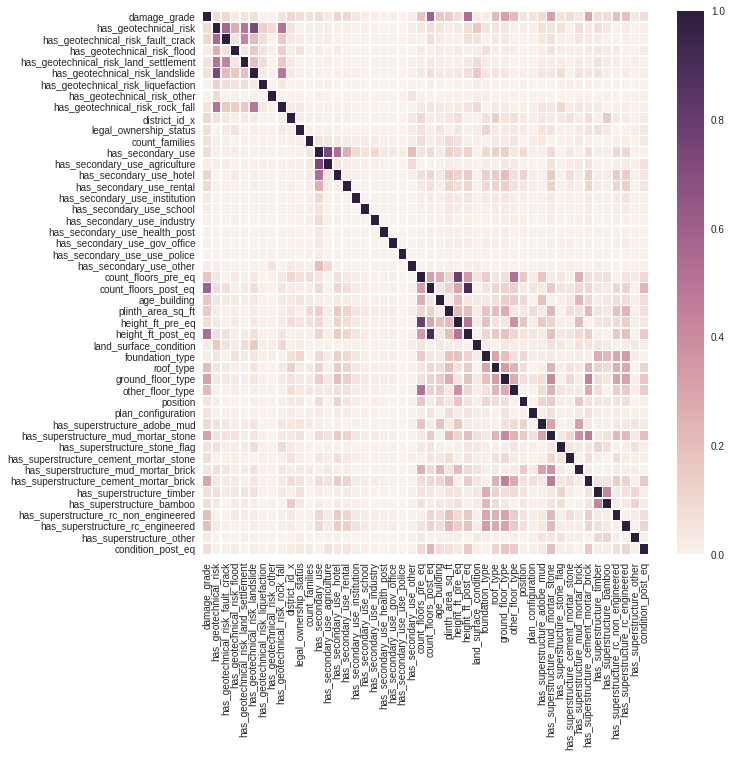

In [295]:
plt.figure(figsize = (10,10))
sns.heatmap(abs(df_train.corr()), linewidth=0.5)

*The damage grade distribution in the training set *

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


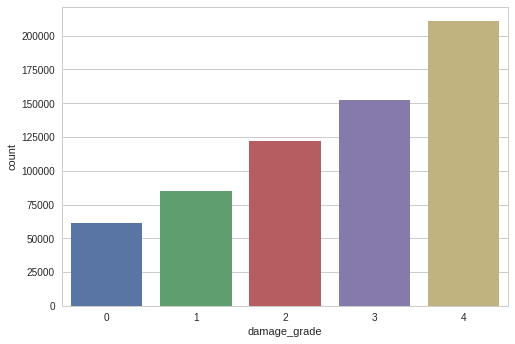

In [296]:
sns.countplot(df_train['damage_grade'])

In [0]:
def plot_new_feature_distribution(df1, df2, df3, df4, df5, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(2,4,figsize=(18,8))

    for feature in features:
        i += 1
        plt.subplot(2,4,i)
        sns.kdeplot(df1[feature], bw=0.5,label=1)
        sns.kdeplot(df2[feature], bw=0.5,label=2)
        sns.kdeplot(df3[feature], bw=0.5,label=3)
        sns.kdeplot(df4[feature], bw=0.5,label=4)
        sns.kdeplot(df5[feature], bw=0.5,label=5)
        plt.xlabel(feature, fontsize=11)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=8)
        plt.tick_params(axis='y', which='major', labelsize=8)
    plt.show();

In [0]:
#these are the continous variables
continuous_var=["count_floors_pre_eq", "count_floors_post_eq", "age_building", "plinth_area_sq_ft", "height_ft_pre_eq", "height_ft_post_eq", "count_families"]
cont_data=pd.DataFrame(df_train["count_floors_pre_eq"])
for i in continuous_var:
  cont_data[i]=df_train[i]
cont_data['damage_grade']=df_train['damage_grade']
t0 = cont_data.loc[cont_data['damage_grade'] == 0]
t1 = cont_data.loc[cont_data['damage_grade'] == 1]
t2 = cont_data.loc[cont_data['damage_grade'] == 2]
t3 = cont_data.loc[cont_data['damage_grade'] == 3]
t4 = cont_data.loc[cont_data['damage_grade'] == 4]

features = cont_data.columns.values[202:]
# plot_new_feature_distribution(t1, t2, t3, t4, t5, features)
# t1.head()


In [299]:
t0.head()

,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,count_families,damage_grade
2,2,3,2,629,15,16,1,0
8,1,2,1,549,6,7,1,0
32,1,2,12,193,8,9,0,0
57,1,2,11,477,11,12,1,0
63,0,1,3,229,5,6,1,0


<Figure size 576x396 with 0 Axes>

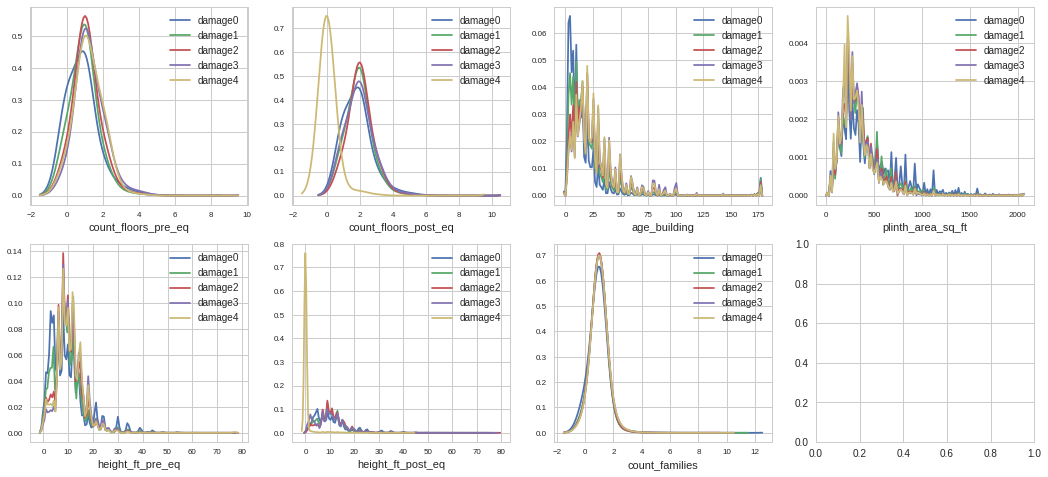

In [300]:
i = 0
sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(2,4,figsize=(18,8))
for feature in continuous_var:
    i += 1
    plt.subplot(2,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="damage0")
    sns.kdeplot(t1[feature], bw=0.5,label="damage1")
    sns.kdeplot(t2[feature], bw=0.5,label="damage2")
    sns.kdeplot(t3[feature], bw=0.5,label="damage3")
    sns.kdeplot(t4[feature], bw=0.5,label="damage4")
    

    plt.xlabel(feature, fontsize=11)
    locs, labels = plt.xticks()
    plt.tick_params(axis='x', which='major', labelsize=8)
    plt.tick_params(axis='y', which='major', labelsize=8)
plt.show();


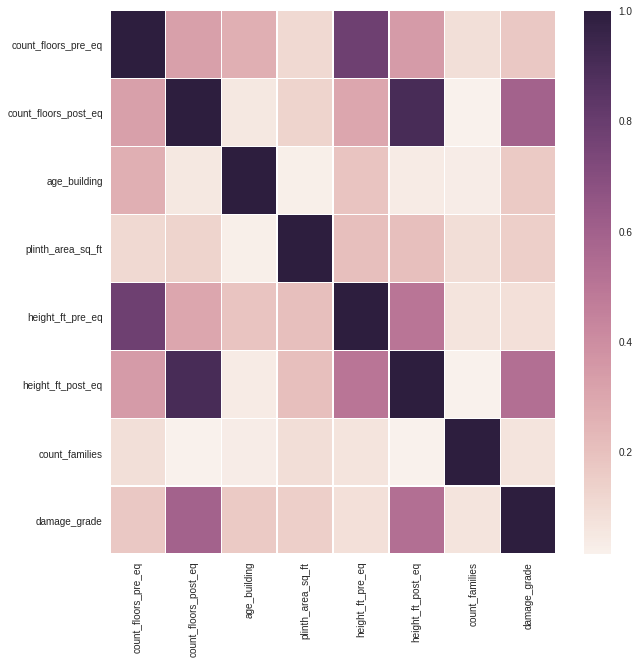

In [301]:
plt.figure(figsize = (10,10))
sns.heatmap(abs(cont_data.corr()), linewidth=0.5)

*feature Engineering*

In [0]:
# "count_floors_pre_eq", "count_floors_post_eq", "age_building", "plinth_area_sq_ft", "height_ft_pre_eq", "height_ft_post_eq", "count_families"
cont_data['add1']=cont_data['height_ft_post_eq']+cont_data['count_floors_post_eq']
cont_data['add2']=cont_data['height_ft_post_eq']-cont_data['count_floors_post_eq']
cont_data['add3']=cont_data['age_building']+cont_data['count_floors_pre_eq']
cont_data['add4']=cont_data['age_building']-cont_data['count_floors_pre_eq']
# cont_data['add5']=cont_data['count_floors_pre_eq']+cont_data['count_floors_post_eq']
# cont_data['add6']=cont_data['count_floors_pre_eq']-cont_data['count_floors_post_eq']
# cont_data['add7']=cont_data['height_ft_pre_eq']+cont_data['count_floors_pre_eq']
# cont_data['add8']=cont_data['height_ft_pre_eq']+cont_data['count_floors_pre_eq']

In [303]:
cont_data.head()

,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,count_families,damage_grade,add1,add2,add3,add4
0,2,3,21,314,14,15,2,3,18,12,23,19
1,2,3,33,531,18,19,1,1,22,16,35,31
2,2,3,2,629,15,16,1,0,19,13,4,0
3,2,0,3,244,14,0,1,4,0,0,5,1
4,1,2,22,214,12,13,1,2,15,11,23,21


In [304]:
cont_data.shape

(631761, 12)

In [305]:
df_train.shape

(631761, 48)

In [0]:
del(df_train['damage_grade'])

In [307]:
result = pd.concat([df_train, cont_data], axis=1)
result.head()

,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,district_id_x,legal_ownership_status,...,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,count_families,damage_grade,add1,add2,add3,add4
0,0,0,0,0,0,0,0,0,10,2,...,21,314,14,15,2,3,18,12,23,19
1,0,0,0,0,0,0,0,0,25,2,...,33,531,18,19,1,1,22,16,35,31
2,0,0,0,0,0,0,0,0,19,2,...,2,629,15,16,1,0,19,13,4,0
3,0,0,0,0,0,0,0,0,16,2,...,3,244,14,0,1,4,0,0,5,1
4,0,0,0,0,0,0,0,0,19,2,...,22,214,12,13,1,2,15,11,23,21


In [308]:
result.shape

(631761, 59)

In [0]:
result=result.dropna()
yy=result.damage_grade
del(result['damage_grade'])
x=result

In [0]:
all_data=x
all_data_t=x.T
all_data_t
covar=np.cov(all_data_t)
covar
eigen_val, eigen_vectors=np.linalg.eig(covar)
eigen_val_vector_pair=[]

for i in range(len(eigen_val)):
    eig_vec=eigen_vectors[:, i]
    eigen_val_vector_pair.append((eigen_val[i], eig_vec))
eigen_val_vector_pair.sort(reverse=True)

In [311]:
counter_eig=0
for i in (eigen_val):
    if(i>0):
        counter_eig+=1
counter_eig

54

In [312]:
x.columns

Index(['has_geotechnical_risk', 'has_geotechnical_risk_fault_crack',
       'has_geotechnical_risk_flood', 'has_geotechnical_risk_land_settlement',
       'has_geotechnical_risk_landslide', 'has_geotechnical_risk_liquefaction',
       'has_geotechnical_risk_other', 'has_geotechnical_risk_rock_fall',
       'district_id_x', 'legal_ownership_status', 'count_families',
       'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'count_floors_pre_eq',
       'count_floors_post_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'height_ft_post_eq', 'land_surface_condition',
       'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type',
       'position', '

In [0]:
from sklearn import decomposition
pca=decomposition.PCA(n_components=54)
x_train_pca=pca.fit_transform(all_data_t.T)
x_train, x_test, y_train, y_test=train_test_split(x_train_pca, yy, test_size=0.2, random_state=1)

In [314]:
clf=ExtraTreesClassifier()
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.6857850624836767

In [0]:
clf = RandomForestClassifier(max_depth=7, min_samples_split=5, bootstrap=True, n_estimators=2000)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

In [0]:
result2 = pd.concat([df_train, cont_data], axis=1)
result2.head()

,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,district_id_x,legal_ownership_status,...,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,count_families,damage_grade,add1,add2,add3,add4
0,0,0,0,0,0,0,0,0,10,2,...,21,314,14,15,2,3,18,12,23,19
1,0,0,0,0,0,0,0,0,25,2,...,33,531,18,19,1,1,22,16,35,31
2,0,0,0,0,0,0,0,0,19,2,...,2,629,15,16,1,0,19,13,4,0
3,0,0,0,0,0,0,0,0,16,2,...,3,244,14,0,1,4,0,0,5,1
4,0,0,0,0,0,0,0,0,19,2,...,22,214,12,13,1,2,15,11,23,21


In [0]:
from google.colab import files

result2.to_csv('mydf.csv')
files.download('mydf.csv')

In [0]:
files.download('mydf.csv')

In [249]:
X_train=pd.read_csv('gdrive/My Drive/Colab Notebooks/mydf.csv')
X_train.head()

,Unnamed: 0,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,district_id_x,...,age_building.1,plinth_area_sq_ft.1,height_ft_pre_eq.1,height_ft_post_eq.1,count_families.1,damage_grade,add1,add2,add3,add4
0,0,0,0,0,0,0,0,0,0,10,...,21,314,14,15,2,3,18,12,23,19
1,1,0,0,0,0,0,0,0,0,25,...,33,531,18,19,1,1,22,16,35,31
2,2,0,0,0,0,0,0,0,0,19,...,2,629,15,16,1,0,19,13,4,0
3,3,0,0,0,0,0,0,0,0,16,...,3,244,14,0,1,4,0,0,5,1
4,4,0,0,0,0,0,0,0,0,19,...,22,214,12,13,1,2,15,11,23,21


NEURAL NETWORKS

In [0]:
X_train=np.loadtxt('gdrive/My Drive/Colab Notebooks/mydf.csv', delimiter=",", usecols=range(1, 60), skiprows=1)

In [0]:
labels=np.genfromtxt('gdrive/My Drive/Colab Notebooks/mydf.csv', delimiter=",", usecols=(55),dtype='int', skip_header=1)

In [277]:
np.unique(labels)


array([0, 1, 2, 3, 4])

In [278]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
enc=OneHotEncoder()
lbl=LabelEncoder()
labels= LabelEncoder().fit_transform(labels.ravel())
trans_labels=labels.reshape(-1,1)
Y_train=enc.fit_transform(trans_labels).toarray()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [267]:
nb_classes=Y_train.shape[1]
dims=X_train.shape[1]
print(nb_classes, "Classes")
print(dims, "dims")

5 Classes
59 dims


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [269]:
dims=X_train.shape[1]
print(dims, 'dims')
print("building the model....")

nb_classes=Y_train.shape[1]
print(nb_classes,"classes")

#dense =fully connected
model=Sequential()
model.add(Dense(nb_classes, input_shape=(dims,), activation='sigmoid'))
# 1st param: no.of units
model.add(Activation('softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy')
model.fit(X_train, Y_train, epochs=10)

59 dims
building the model....
5 classes
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
631761/631761 [==============================] - 20s 31us/step - loss: 1.5782
Epoch 2/10
631761/631761 [==============================] - 20s 32us/step - loss: 1.5665
Epoch 3/10
631761/631761 [==============================] - 19s 30us/step - loss: 1.5601
Epoch 4/10
631761/631761 [==============================] - 19s 30us/step - loss: 1.5577
Epoch 5/10
631761/631761 [==============================] - 19s 30us/step - loss: 1.5388
Epoch 6/10
631761/631761 [==============================] - 19s 31us/step - loss: 1.5048
Epoch 7/10
631761/631761 [==============================] - 19s 30us/step - loss: 1.4928
Epoch 8/10
631761/631761 [==============================] - 19s 30us/step - loss: 1.4867
Epoch 9/10
631761/631761 [==============================] - 19s 30us/step - loss: 1.4787
Epoch 10/10
631761/631761 [===========

In [279]:
X_train, X_test, Y_train, Y_test=train_test_split(X_train, Y_train, test_size=0.15, random_state=0)
X_train, X_val, Y_train, Y_val=train_test_split(X_train, Y_train, test_size=0.15, random_state=0)
print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape)

(456446, 59) (456446, 5) (80550, 59) (80550, 5)


In [280]:
model=Sequential()
model.add(Dense(100, input_shape=(dims, )))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy')
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=20,
         batch_size=120, verbose=True)

Train on 456446 samples, validate on 80550 samples
Epoch 1/20
456446/456446 [==============================] - 7s 15us/step - loss: 11.6235 - val_loss: 10.7289
Epoch 2/20
456446/456446 [==============================] - 6s 14us/step - loss: 10.7426 - val_loss: 10.7253
Epoch 3/20
456446/456446 [==============================] - 6s 14us/step - loss: 11.8374 - val_loss: 12.2360
Epoch 4/20
456446/456446 [==============================] - 7s 14us/step - loss: 11.5605 - val_loss: 10.7263
Epoch 5/20
456446/456446 [==============================] - 6s 14us/step - loss: 10.8952 - val_loss: 10.7105
Epoch 6/20
456446/456446 [==============================] - 7s 14us/step - loss: 12.2532 - val_loss: 12.2324
Epoch 7/20
456446/456446 [==============================] - 6s 14us/step - loss: 11.1547 - val_loss: 10.6751
Epoch 8/20
456446/456446 [==============================] - 7s 14us/step - loss: 8.6209 - val_loss: 5.2904
Epoch 9/20
456446/456446 [==============================] - 6s 14us/step - loss

In [281]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               6000      
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 505       
_________________________________________________________________
activation_3 (Activation)    (None, 5)                 0         
Total params: 6,505
Trainable params: 6,505
Non-trainable params: 0
_________________________________________________________________


In [282]:
y_pred=model.predict(X_test, verbose=True)

94765/94765 [==============================] - 1s 12us/step


In [283]:
y_pred.argmax(axis=-1)


array([4, 4, 4, ..., 2, 4, 0])

In [0]:
y_pred2=model.predict(X_val)
val_Y=y_pred2.argmax(axis=-1)

In [285]:
val_Y.shape
Y_val.shape

(80550, 5)

In [0]:
def decode(datum):
    return np.argmax(datum)
Y_va=[]
for i in range(Y_val.shape[0]):
    datum = Y_val[i]
    decoded_datum = decode(Y_val[i])
    Y_va.append(decoded_datum)

In [0]:
Yva=np.array(Y_va)

In [288]:
Yva.shape


(80550,)

In [289]:
from sklearn.metrics import accuracy_score
accuracy_score(Yva, val_Y)

0.460707635009311

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from xgboost.sklearn import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
import seaborn as sns
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter('error', SettingWithCopyWarning)






In [4]:
#forgot to use owner and structure data. WIP
print(train.head())
print(test.head())

print(train.info())
print(test.info())

for x in train.columns:
    print(train[x].unique())
for x in test.columns:
    print(test[x].unique())


       area_assesed  building_id damage_grade  district_id  \
0              Both  24385bfd2a2      Grade 4           24   
1              Both  405d1bbebbf      Grade 2           44   
2              Both  351d9bc71f6      Grade 1           36   
3  Building removed  2be3a971166      Grade 5           30   
4              Both  34c7d073ea6      Grade 3           36   

   has_geotechnical_risk  has_geotechnical_risk_fault_crack  \
0                    0.0                                  0   
1                    0.0                                  0   
2                    0.0                                  0   
3                    0.0                                  0   
4                    0.0                                  0   

   has_geotechnical_risk_flood  has_geotechnical_risk_land_settlement  \
0                            0                                      0   
1                            0                                      0   
2                            

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631761 entries, 0 to 631760
Data columns (total 9 columns):
building_id                              631761 non-null object
damage_grade                             631761 non-null object
has_geotechnical_risk_fault_crack        631761 non-null int64
has_geotechnical_risk_flood              631761 non-null int64
has_geotechnical_risk_land_settlement    631761 non-null int64
has_geotechnical_risk_landslide          631761 non-null int64
has_geotechnical_risk_liquefaction       631761 non-null int64
has_geotechnical_risk_other              631761 non-null int64
has_geotechnical_risk_rock_fall          631761 non-null int64
dtypes: int64(7), object(2)
memory usage: 43.4+ MB


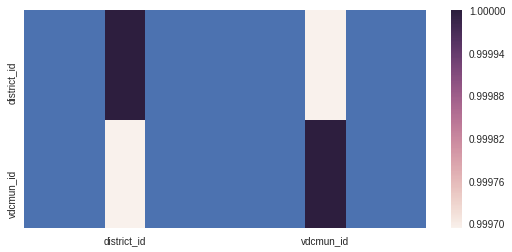

In [5]:
# Perform EDA to create hypotheses

non_risks=['area_assesed', 'district_id', 'has_repair_started','vdcmun_id','has_geotechnical_risk']

# Create x variables for risk counts for bar plots
count_risks=train.drop(non_risks, axis=1)
count_risks.info()
count_risks['total_risks']=count_risks.sum(axis=1)

damage_vs_num_risks=count_risks.groupby(['damage_grade','total_risks']).size()
dvr=damage_vs_num_risks.reset_index()
dvr.columns=['damage_grade','total_risks','counts']
dvr_p=pd.pivot_table(dvr,'counts','damage_grade','total_risks')

plt.figure(figsize=[9,4])
for x in range(0,7):
    plt.bar(dvr_p[x].index,dvr_p[x].values)
plt.savefig('test.png')

# Plotted damage grade vs count of number of risks per building.
# Seems damage is correlated negatively to the number of geotechnical risks in the area. Perhaps damage grade is rated from grade 5 being low damage to grade 1 being high damage.

# Plot damage grade vs district and municipality
non_locations=['district_id', 'vdcmun_id', 'damage_grade']
location_df=train[non_locations]

corr = location_df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
#knowing the district and municipality are definitely correlated, we can drop the more complex column

train.drop('vdcmun_id', axis=1, inplace=True)
test.drop('vdcmun_id', axis=1, inplace=True)

# has_repair_started is a leakage column of data because repairs will start after the damage has occured. Our task is to predict the level of damage in a building in a particular area given several geotechnical risks, so it is a form of leaky predictor.

train.drop('has_repair_started', axis=1, inplace=True)
test.drop('has_repair_started', axis=1, inplace=True)

# building_id does not matter for training purposes so we should drop this column from both sets but retain to add to submission data later

test_id=test.building_id
train_id=train.building_id

train.drop('building_id', axis=1, inplace=True)
test.drop('building_id', axis=1, inplace=True)

# as long as we do not sort values, we should be able to concatenate the two later on


In [6]:
# create dummy variables for area_assesed and district_id
train = pd.concat([train.drop('area_assesed', axis=1), pd.get_dummies(train['area_assesed'])], axis=1)
train= pd.concat([train.drop('district_id', axis=1), pd.get_dummies(train['district_id'])], axis=1)

test= pd.concat([test.drop('area_assesed', axis=1), pd.get_dummies(test['area_assesed'])], axis=1)
test= pd.concat([test.drop('district_id', axis=1), pd.get_dummies(test['district_id'])], axis=1)


train['damage_grade']=list(map(lambda x: x.split(' ')[1], train['damage_grade']))
train['damage_grade']=train['damage_grade'].astype(int)
train.info()
# now we build a simple model with logisticregression and onevsrestclassifier

clf=OneVsRestClassifier(LogisticRegression())
x_train=train.drop('damage_grade', axis=1)
y_train=pd.get_dummies(train['damage_grade'])
clf.fit(x_train,y_train)

print("Accuracy: {}".format(clf.score(x_train, y_train))) #not accuracy 30% only.
x_test=test
predictions = clf.predict_proba(x_test)
pred=pd.DataFrame(predictions, columns=y_train.columns)

#return later when bderiel





# now build model with xgboost using objective:softmax and testing for best CV params
#cv_params = {'max_depth':[3,5]}
#clf_params={'objective':'multi:softmax','nthread':2,'max_depth':3,'n_estimators':1000,'subsample':0.5}
#
#clf=XGBClassifier(**clf_params)
#
#model=GridSearchCV(clf, cv_params, scoring='accuracy', cv=3, n_jobs=3)
#
#model.fit(x_train, train['damage_grade'])

params={}
params['objective'] = 'multi:softmax'
# scale weight of positive examples
params['eta'] = 0.1
params['max_depth'] = 7
params['silent'] = 1
params['nthread'] = 4
params['num_class'] = 6
params['subsample']=0.8
params['colsample_bytree']=0.7
params['min_child_weight']=3

xgb_train=xgb.DMatrix(x_train, label=train['damage_grade'])
xgb_test=xgb.DMatrix(x_test,label =np.zeros(len(x_test)))

watchlist = [(xgb_train, 'train'), (xgb_test, 'test')]
num_round = 25
bst = xgb.train(params, xgb_train, num_round, watchlist)
# get prediction
train_pred=bst.predict(xgb_train)
preds = bst.predict(xgb_test)
error_rate = np.sum(train_pred != train['damage_grade']) / train['damage_grade'].shape[0]
print('Accuracy using softmax = {}'.format(1-error_rate))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631761 entries, 0 to 631760
Data columns (total 45 columns):
damage_grade                             631761 non-null int64
has_geotechnical_risk                    631761 non-null float64
has_geotechnical_risk_fault_crack        631761 non-null int64
has_geotechnical_risk_flood              631761 non-null int64
has_geotechnical_risk_land_settlement    631761 non-null int64
has_geotechnical_risk_landslide          631761 non-null int64
has_geotechnical_risk_liquefaction       631761 non-null int64
has_geotechnical_risk_other              631761 non-null int64
has_geotechnical_risk_rock_fall          631761 non-null int64
Both                                     631761 non-null uint8
Building removed                         631761 non-null uint8
Exterior                                 631761 non-null uint8
Interior                                 631761 non-null uint8
Not able to inspect                      631761 non-null uint8
7    

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Accuracy: 0.2999393758082566
[0]	train-merror:0.481704	test-merror:1
[1]	train-merror:0.458715	test-merror:1
[2]	train-merror:0.45726	test-merror:1
[3]	train-merror:0.456014	test-merror:1
[4]	train-merror:0.458664	test-merror:1
[5]	train-merror:0.459022	test-merror:1
[6]	train-merror:0.459403	test-merror:1
[7]	train-merror:0.457909	test-merror:1
[8]	train-merror:0.458555	test-merror:1
[9]	train-merror:0.458159	test-merror:1
[10]	train-merror:0.457899	test-merror:1
[11]	train-merror:0.458002	test-merror:1
[12]	train-merror:0.457108	test-merror:1
[13]	train-merror:0.457004	test-merror:1
[14]	train-merror:0.457162	test-merror:1
[15]	train-merror:0.456844	test-merror:1
[16]	train-merror:0.456719	test-merror:1
[17]	train-merror:0.455593	test-merror:1
[18]	train-merror:0.456351	test-merror:1
[19]	train-merror:0.455432	test-merror:1
[20]	train-merror:0.454564	test-merror:1
[21]	train-merror:0.454501	test-merror:1
[22]	train-merror:0.454371	test-merror:1
[23]	train-merror:0.454306	test-merror:

# TRAIN FRM HERE

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

In [9]:
# train=pd.read_csv('gdrive/My Drive/Colab Notebooks/Dataset/train.csv')
# test=pd.read_csv('gdrive/My Drive/Colab Notebooks/Dataset/test.csv')
# owner=pd.read_csv('gdrive/My Drive/Colab Notebooks/Dataset/Building_Ownership_Use.csv')
# structure=pd.read_csv('gdrive/My Drive/Colab Notebooks/Dataset/Building_Structure.csv')

building_own =pd.read_csv('gdrive/My Drive/Colab Notebooks/Dataset/Building_Ownership_Use.csv')
building_own.head()



,building_id,district_id,vdcmun_id,ward_id,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,a3380c4f75,7,701,70102,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
1,a3380c4fd9,7,701,70102,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
2,a3380c503e,7,701,70102,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
3,a338a4e5f2,7,701,70103,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
4,a338a4e653,7,701,70103,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0


In [10]:
train = pd.read_csv('gdrive/My Drive/Colab Notebooks/Dataset/train.csv')
train.shape

(631761, 14)

In [0]:
building_str = pd.read_csv('gdrive/My Drive/Colab Notebooks/Dataset/Building_Structure.csv')


In [12]:
test = pd.read_csv('gdrive/My Drive/Colab Notebooks/Dataset/test.csv')
test.shape

(421175, 13)

In [0]:
#Merging the files
combine = pd.merge(building_own,building_str, on='building_id')
res_train = pd.merge(combine,train, on = 'building_id')
res_test = pd.merge(combine,test, on = 'building_id')

In [14]:
res_train.head()

,building_id,district_id_x,vdcmun_id_x,ward_id_x,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,...,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,vdcmun_id
0,a3380c4fd9,7,701,70102,Private,1.0,0.0,0,0,0,...,0.0,0,0,0,0,0,0,0,1.0,701
1,a3380c503e,7,701,70102,Private,1.0,0.0,0,0,0,...,0.0,0,0,0,0,0,0,0,1.0,701
2,a338a4e5f2,7,701,70103,Private,1.0,0.0,0,0,0,...,0.0,0,0,0,0,0,0,0,1.0,701
3,a338a4e71f,7,701,70103,Private,1.0,0.0,0,0,0,...,0.0,0,0,0,0,0,0,0,1.0,701
4,a339d612f3,7,701,70105,Private,1.0,0.0,0,0,0,...,0.0,0,0,0,0,0,0,0,1.0,701


In [15]:
res_train.describe()


,district_id_x,vdcmun_id_x,ward_id_x,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,...,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,vdcmun_id
count,631761.000000,631761.000000,631761.000000,631760.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,...,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,598344.000000,631761.000000
mean,26.831720,2712.186552,271224.334601,0.984075,0.112334,0.063974,0.034182,0.008391,0.000972,0.000397,...,0.123920,0.042708,0.009263,0.034602,0.069629,0.002319,0.001061,0.034853,0.316076,2712.186552
std,7.771394,777.505768,77750.671303,0.419209,0.315777,0.244706,0.181697,0.091216,0.031160,0.019928,...,0.329491,0.202197,0.095798,0.182769,0.254521,0.048099,0.032548,0.183408,0.464943,777.505768
min,7.000000,701.000000,70102.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,701.000000
25%,22.000000,2242.000000,224201.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2242.000000
50%,27.000000,2703.000000,270301.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2703.000000
75%,31.000000,3119.000000,311901.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3119.000000
max,51.000000,5142.000000,514209.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5142.000000


In [0]:
res_train = res_train.drop((['vdcmun_id_y','district_id_y','ward_id_y','vdcmun_id','district_id']) , axis = 1)

In [0]:
res_test = res_test.drop((['vdcmun_id_y','district_id_y','ward_id_y','vdcmun_id','district_id']) , axis = 1)

In [18]:
len(res_train)


631761

In [0]:
columns = list(res_train.columns.values)
#columns

In [20]:
res_test.shape


(421175, 52)

In [21]:
res_train.shape


(631761, 53)

In [22]:
res_train.columns[res_train.isnull().any()]


Index(['count_families', 'has_repair_started'], dtype='object')

In [23]:
miss = res_train.isnull().sum() / len(res_train)
miss = miss[miss > 0]
miss

count_families        0.000002
has_repair_started    0.052895
dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


(array([0, 1]), <a list of 2 Text xticklabel objects>)

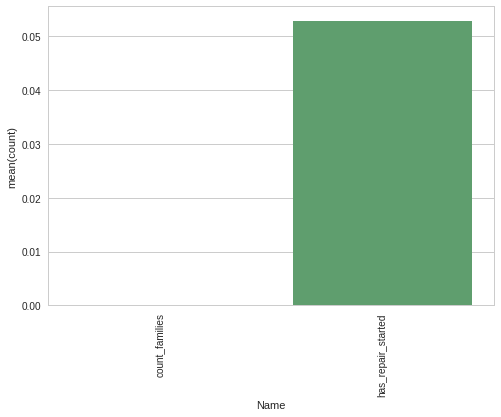

In [24]:
miss = miss.to_frame()
miss.columns = ['count']
miss.index.names = ['Name']
miss['Name'] = miss.index

#Plotting the values

sns.set(style = "whitegrid", color_codes = True)
sns.barplot(x = 'Name', y = 'count',data = miss )
plt.xticks(rotation = 90)

Grade 5    210825
Grade 4    152244
Grade 3    122288
Grade 2     85084
Grade 1     61320
Name: damage_grade, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

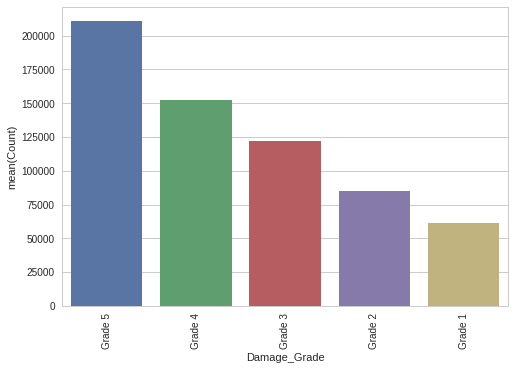

In [25]:
target = res_train['damage_grade'].value_counts()
print(target)
target = target.to_frame()
target.columns = ['Count']
target.index.names = ['Damage_Grade']
target['Damage_Grade'] = target.index 

#Plotting the Target variable
sns.set(style = 'whitegrid', color_codes = True)
sns.barplot(x = 'Damage_Grade', y = 'Count', data = target)
plt.xticks(rotation = 90)

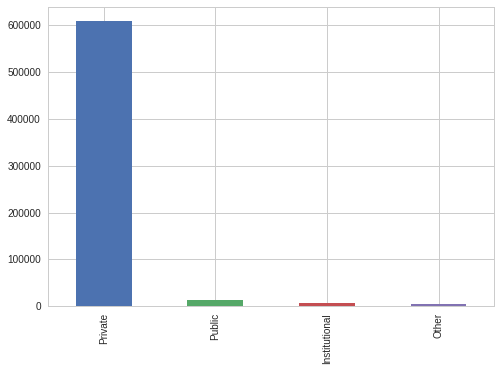

In [26]:
res_train['legal_ownership_status'].value_counts().plot.bar()


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


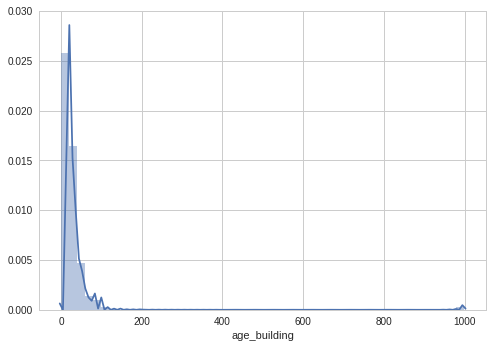

In [27]:
sns.distplot(res_train['age_building'])


In [28]:
print("The skewness of Age of building is {}".format(res_train['age_building'].skew()))


The skewness of Age of building is 12.356283383410254


1.0     547837
0.0      50659
2.0      27771
3.0       4185
4.0        939
5.0        262
6.0         73
7.0         19
8.0          9
9.0          5
11.0         1
Name: count_families, dtype: int64


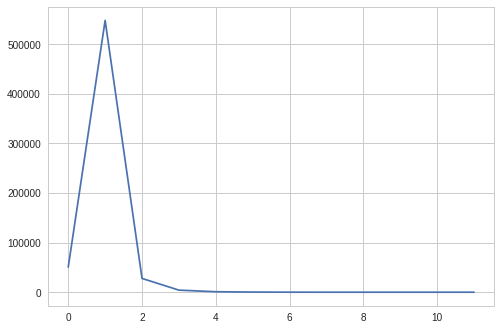

In [29]:
print(res_train['count_families'].value_counts())
res_train['count_families'].value_counts().sort_index().plot.line()

In [30]:
print("The skewness of Count of families is {}".format(res_train['count_families'].skew()))

The skewness of Count of families is 1.673681887513851


['Damaged-Repaired and used' 'Damaged-Not used' 'Damaged-Rubble clear'
 'Damaged-Rubble Clear-New building built' 'Damaged-Used in risk'
 'Damaged-Rubble unclear' 'Not damaged' 'Covered by landslide']


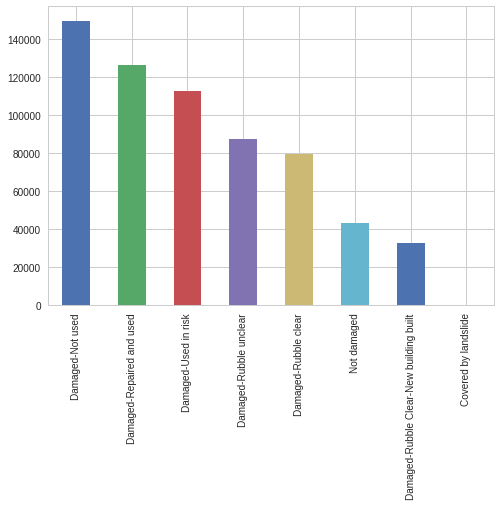

In [31]:
print(res_train['condition_post_eq'].unique())
res_train['condition_post_eq'].value_counts().plot.bar()

In [0]:
import scipy.stats as ss
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [33]:
clean_up = {'damage_grade' : {"Grade 1" : 1, "Grade 2" : 2, "Grade 3" : 3,"Grade 4" : 4,"Grade 5" : 5}}
train_dg = pd.DataFrame()
train_dg['damage_grade'] = res_train['damage_grade']

train_dg.replace(clean_up, inplace = True)
print(train_dg['damage_grade'].head())

res_train['damage_grade'] = train_dg['damage_grade']
res_train['damage_grade'].head()

0    2
1    3
2    3
3    4
4    3
Name: damage_grade, dtype: int64


0    2
1    3
2    3
3    4
4    3
Name: damage_grade, dtype: int64

In [0]:
cat = [c for c in res_train if res_train[c].dtypes == "object"]

In [0]:
cat.remove('building_id')


In [0]:
def ChiSquareTest(cat,res_train):
  
  for c in cat:
    print(c)
    tab = pd.crosstab(res_train['damage_grade'], res_train[c])
    stat, p, dof, expected = chi2_contingency(tab)
    print('dof=%d' % dof)
    #print(expected)
    # interpret test-statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
    if abs(stat) >= critical:
      print('Dependent (reject H0)')
    else:
      print('Independent (fail to reject H0)')
    # interpret p-value
    alpha = 1.0 - prob
    print('significance=%.3f, p=%.3f' % (alpha, p))
    if p <= alpha:
      print('Dependent (reject H0)')
    else:
      print('Independent (fail to reject H0)')
     
    print(" ")

In [37]:
ChiSquareTest(cat,res_train)


legal_ownership_status
dof=12
probability=0.950, critical=21.026, stat=8113.932
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
land_surface_condition
dof=8
probability=0.950, critical=15.507, stat=1408.392
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
foundation_type
dof=16
probability=0.950, critical=26.296, stat=138103.743
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
roof_type
dof=8
probability=0.950, critical=15.507, stat=85099.545
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
ground_floor_type
dof=16
probability=0.950, critical=26.296, stat=107177.045
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
other_floor_type
dof=12
probability=0.950, critical=21.026, stat=93978.074
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
position
dof=12
probability=0.950, critical=21.026, stat=5026.896
Dependent (reject H0)
significance=0.

In [38]:

cat_binary = [c for c in res_train if len(res_train[c].unique()) == 2]
cat_binary

['has_secondary_use',
 'has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_office',
 'has_secondary_use_use_police',
 'has_secondary_use_other',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'has_geotechnical_risk',
 'has_geotechnical_risk_fault_crack',
 'has_geotechnical_risk_flood',
 'has_geotechnical_risk_land_settlement',
 'has_geotechnical_risk_landslide',
 'has_geotechnical_risk_liquefaction',
 'has_geotechnical_risk_other',
 'has_geotechnical_r

In [0]:
def cramers_v(x, y):
  correlation_coeff = []
  for c in cat_binary:
    confusion_matrix = pd.crosstab(res_train[c],y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    
    correlation_coeff.append([c,np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))])
    
  return correlation_coeff

In [40]:
cramers_v(cat_binary, res_train['damage_grade'])


[['has_secondary_use', 0.08441248217165927],
 ['has_secondary_use_agriculture', 0.05948222661881513],
 ['has_secondary_use_hotel', 0.11931727185148487],
 ['has_secondary_use_rental', 0.10798851155159755],
 ['has_secondary_use_institution', 0.04000696439985445],
 ['has_secondary_use_school', 0.02115838376096302],
 ['has_secondary_use_industry', 0.012146442641532596],
 ['has_secondary_use_health_post', 0.009057079201118534],
 ['has_secondary_use_gov_office', 0.010428605108001273],
 ['has_secondary_use_use_police', 0.001672082018154515],
 ['has_secondary_use_other', 0.024000617699672995],
 ['has_superstructure_adobe_mud', 0.10906485273848247],
 ['has_superstructure_mud_mortar_stone', 0.3516007808920147],
 ['has_superstructure_stone_flag', 0.06369988742717195],
 ['has_superstructure_cement_mortar_stone', 0.07605311792908845],
 ['has_superstructure_mud_mortar_brick', 0.09329851436407582],
 ['has_superstructure_cement_mortar_brick', 0.31581765697361813],
 ['has_superstructure_timber', 0.0821

In [41]:
ChiSquareTest(cat_binary,res_train)


has_secondary_use
dof=4
probability=0.950, critical=9.488, stat=4505.585
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
has_secondary_use_agriculture
dof=4
probability=0.950, critical=9.488, stat=2239.252
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
has_secondary_use_hotel
dof=4
probability=0.950, critical=9.488, stat=8998.122
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
has_secondary_use_rental
dof=4
probability=0.950, critical=9.488, stat=7371.281
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
has_secondary_use_institution
dof=4
probability=0.950, critical=9.488, stat=1015.168
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
has_secondary_use_school
dof=4
probability=0.950, critical=9.488, stat=286.825
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
has_secondary_use_industry
dof=4
probability=0.950, critical=9.488, stat=97

In [42]:
res_train.drop(['has_secondary_use_use_police','building_id'], axis = 1)
res_test.drop(['has_secondary_use_use_police','building_id'], axis = 1)

,district_id_x,vdcmun_id_x,ward_id_x,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,...,area_assesed,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started
0,7,701,70102,Private,1.0,0.0,0,0,0,0,...,Both,0.0,0,0,0,0,0,0,0,1.0
1,7,701,70103,Private,1.0,0.0,0,0,0,0,...,Both,0.0,0,0,0,0,0,0,0,1.0
2,7,701,70103,Private,1.0,0.0,0,0,0,0,...,Building removed,0.0,0,0,0,0,0,0,0,1.0
3,7,701,70106,Private,1.0,0.0,0,0,0,0,...,Both,0.0,0,0,0,0,0,0,0,1.0
4,7,701,70107,Private,1.0,0.0,0,0,0,0,...,Building removed,0.0,0,0,0,0,0,0,0,1.0
5,7,701,70107,Private,1.0,0.0,0,0,0,0,...,Both,0.0,0,0,0,0,0,0,0,0.0
6,7,701,70107,Private,1.0,0.0,0,0,0,0,...,Both,0.0,0,0,0,0,0,0,0,1.0
7,7,701,70109,Private,1.0,0.0,0,0,0,0,...,Building removed,0.0,0,0,0,0,0,0,0,1.0
8,7,701,70109,Private,1.0,0.0,0,0,0,0,...,Both,0.0,0,0,0,0,0,0,0,1.0
9,7,701,70109,Private,1.0,0.0,0,0,0,0,...,Both,0.0,0,0,0,0,0,0,0,1.0


In [43]:
cont = [c for c in res_train if len(res_train[c].unique()) > 15]
cont

['building_id',
 'district_id_x',
 'vdcmun_id_x',
 'ward_id_x',
 'age_building',
 'plinth_area_sq_ft',
 'height_ft_pre_eq',
 'height_ft_post_eq']

In [0]:
indices = 0,1,2,3
cont = [i for j, i in enumerate(cont) if j not in indices]

In [45]:
cont

['age_building', 'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq']

In [0]:

def hist_cont(cont, res_train):
  nd = pd.melt(res_train, value_vars = cont)
  n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
  n1 = n1.map(sns.distplot, 'value')
  
  return n1

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


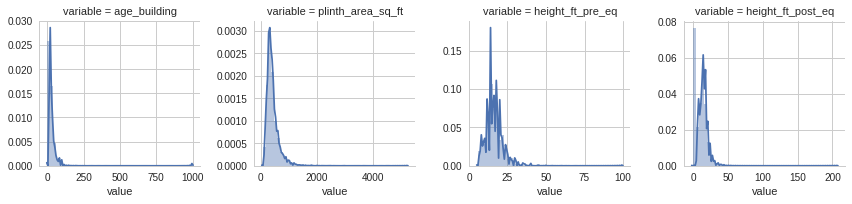

In [47]:
hist_cont(cont,res_train)


In [48]:
from scipy.stats import skew
skewed = res_train[cont].apply(lambda x: skew(x.dropna().astype(float)))
print(skewed)
skewed = skewed[skewed > 0.30]
skewed = skewed.index
res_train[skewed] = np.log1p(res_train[skewed])
res_test[skewed] = np.log1p(res_test[skewed])

age_building         12.356254
plinth_area_sq_ft     3.611024
height_ft_pre_eq      2.024236
height_ft_post_eq     0.485025
dtype: float64


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


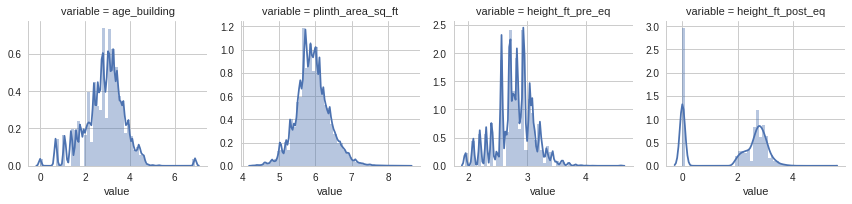

In [49]:
hist_cont(cont,res_train)


In [0]:
def calculateDistribution(cat, res_train):
  for c in cat:
    print(c)
    print((res_train[c].value_counts())/ len(res_train[c]))
    print(" ")

In [51]:
calculateDistribution(cat,res_train)


legal_ownership_status
Private          0.962939
Public           0.021294
Institutional    0.009940
Other            0.005827
Name: legal_ownership_status, dtype: float64
 
land_surface_condition
Flat              0.830164
Moderate slope    0.137870
Steep slope       0.031966
Name: land_surface_condition, dtype: float64
 
foundation_type
Mud mortar-Stone/Brick    0.841331
Bamboo/Timber             0.057590
Cement-Stone/Brick        0.054574
RC                        0.040962
Other                     0.005543
Name: foundation_type, dtype: float64
 
roof_type
Bamboo/Timber-Light roof    0.701973
Bamboo/Timber-Heavy roof    0.235493
RCC/RB/RBC                  0.062535
Name: roof_type, dtype: float64
 
ground_floor_type
Mud            0.804121
Brick/Stone    0.095558
RC             0.094446
Timber         0.003902
Other          0.001974
Name: ground_floor_type, dtype: float64
 
other_floor_type
TImber/Bamboo-Mud    0.632353
Timber-Planck        0.168374
Not applicable       0.152426
RC

In [52]:
res_train_copy = res_train
res_train_copy.head()

,building_id,district_id_x,vdcmun_id_x,ward_id_x,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,...,damage_grade,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started
0,a3380c4fd9,7,701,70102,Private,1.0,0.0,0,0,0,...,2,0.0,0,0,0,0,0,0,0,1.0
1,a3380c503e,7,701,70102,Private,1.0,0.0,0,0,0,...,3,0.0,0,0,0,0,0,0,0,1.0
2,a338a4e5f2,7,701,70103,Private,1.0,0.0,0,0,0,...,3,0.0,0,0,0,0,0,0,0,1.0
3,a338a4e71f,7,701,70103,Private,1.0,0.0,0,0,0,...,4,0.0,0,0,0,0,0,0,0,1.0
4,a339d612f3,7,701,70105,Private,1.0,0.0,0,0,0,...,3,0.0,0,0,0,0,0,0,0,1.0


In [53]:
res_test_copy = res_test
res_test_copy.head()

,building_id,district_id_x,vdcmun_id_x,ward_id_x,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,...,area_assesed,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started
0,a3380c4f75,7,701,70102,Private,1.0,0.0,0,0,0,...,Both,0.0,0,0,0,0,0,0,0,1.0
1,a338a4e653,7,701,70103,Private,1.0,0.0,0,0,0,...,Both,0.0,0,0,0,0,0,0,0,1.0
2,a338a4e6b7,7,701,70103,Private,1.0,0.0,0,0,0,...,Building removed,0.0,0,0,0,0,0,0,0,1.0
3,a33a6eaa3a,7,701,70106,Private,1.0,0.0,0,0,0,...,Both,0.0,0,0,0,0,0,0,0,1.0
4,a33b073ff6,7,701,70107,Private,1.0,0.0,0,0,0,...,Building removed,0.0,0,0,0,0,0,0,0,1.0


In [0]:
res_train_copy['IsPrivate'] = (res_train_copy["legal_ownership_status"] == "Private") * 1 
res_test_copy['IsPrivate'] = (res_test_copy["legal_ownership_status"] == "Private") * 1

In [0]:
res_train_copy['IsFlat'] = (res_train_copy["land_surface_condition"] == "Flat") * 1
res_test_copy['IsFlat'] = (res_test_copy["land_surface_condition"] == "Flat") * 1

In [0]:
res_train_copy['IsMudFoundation'] = (res_train_copy["foundation_type"] == "Mud mortar-Stone/Brick") * 1
res_test_copy['IsMudFoundation'] = (res_test_copy["foundation_type"] == "Mud mortar-Stone/Brick") * 1

In [0]:
res_train_copy['IsBambooRoofLight'] = (res_train_copy["roof_type"] == "Bamboo/Timber-Light roof") * 1
res_test_copy['IsBambooRoofLight'] = (res_test_copy["roof_type"] == "Bamboo/Timber-Light roof") * 1

In [0]:
res_train_copy['IsFloorTypeMud'] = (res_train_copy["ground_floor_type"] == "Mud") * 1
res_test_copy['IsFloorTypeMud'] = (res_test_copy["ground_floor_type"] == "Mud") * 1

In [0]:
res_train_copy['OtherFloorTypeMud'] = (res_train_copy["other_floor_type"] == "TImber/Bamboo-Mud") * 1
res_test_copy['OtherFloorTypeMud'] = (res_test_copy["other_floor_type"] == "TImber/Bamboo-Mud") * 1

In [0]:
res_train_copy['IsNotAttached'] = (res_train_copy["position"] == "Not attached") * 1
res_test_copy['IsNotAttached'] = (res_test_copy["position"] == "Not attached") * 1

In [0]:
res_train_copy['IsPlanConfigRectangular'] = (res_train_copy["plan_configuration"] == "Rectangular") * 1
res_test_copy['IsPlanConfigRectangular'] = (res_test_copy["plan_configuration"] == "Rectangular") * 1

In [0]:
res_train_copy['count_floors_change'] = (res_train_copy['count_floors_post_eq'] - res_train_copy['count_floors_pre_eq'])
res_train_copy['height_ft_change'] = (res_train_copy['height_ft_post_eq'] - res_train_copy['height_ft_pre_eq'])
res_test_copy['count_floors_change'] = (res_test_copy['count_floors_post_eq'] - res_test_copy['count_floors_pre_eq'])
res_test_copy['height_ft_change'] = (res_test_copy['height_ft_post_eq'] - res_test_copy['height_ft_pre_eq'])

In [63]:
res_train_copy.head()


,building_id,district_id_x,vdcmun_id_x,ward_id_x,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,...,IsPrivate,IsFlat,IsMudFoundation,IsBambooRoofLight,IsFloorTypeMud,OtherFloorTypeMud,IsNotAttached,IsPlanConfigRectangular,count_floors_change,height_ft_change
0,a3380c4fd9,7,701,70102,Private,1.0,0.0,0,0,0,...,1,0,1,1,1,0,0,1,0,0.0
1,a3380c503e,7,701,70102,Private,1.0,0.0,0,0,0,...,1,0,1,1,1,1,0,1,0,0.0
2,a338a4e5f2,7,701,70103,Private,1.0,0.0,0,0,0,...,1,0,1,1,1,1,0,1,0,0.0
3,a338a4e71f,7,701,70103,Private,1.0,0.0,0,0,0,...,1,0,1,1,1,0,0,1,0,0.0
4,a339d612f3,7,701,70105,Private,1.0,0.0,0,0,0,...,1,0,1,1,1,0,0,1,0,0.0


In [0]:
res_train_copy.drop(['count_floors_pre_eq', 'height_ft_pre_eq'], axis=1, inplace=True)
res_test_copy.drop(['count_floors_pre_eq', 'height_ft_pre_eq'], axis=1, inplace=True)

In [0]:
remove_columns = ["legal_ownership_status","land_surface_condition","foundation_type","roof_type","ground_floor_type","other_floor_type","position","plan_configuration","count_floors_post_eq","height_ft_post_eq"]
def dropColumns(res_train_copy,res_test_copy,remove_columns):
  for i in remove_columns:
    res_train_copy.drop([i],axis = 1, inplace = True)
    res_test_copy.drop([i],axis = 1, inplace = True)
    
  return res_train_copy,res_test_copy

In [0]:
res_train_copy, res_test_copy = dropColumns(res_train_copy,res_test_copy,remove_columns)

In [67]:
res_train_copy.shape


(631761, 51)

In [68]:
res_test_copy.shape


(421175, 50)

In [0]:
res_train_copy.drop(['building_id'], axis = 1, inplace = True)
res_test_copy.drop(['building_id'], axis = 1, inplace = True)

In [70]:
miss

,count,Name
Name,,
count_families,0.000002,count_families
has_repair_started,0.052895,has_repair_started


In [0]:
res_train_copy['count_families'].fillna(res_train_copy['count_families'].mode()[0],inplace=True)
res_test_copy['count_families'].fillna(res_test_copy['count_families'].mode()[0],inplace=True)

In [72]:
print(res_train_copy['has_repair_started'].value_counts())
print(res_test_copy['has_repair_started'].value_counts())

0.0    409222
1.0    189122
Name: has_repair_started, dtype: int64
0.0    273041
1.0    126212
Name: has_repair_started, dtype: int64


In [0]:
res_train_copy['has_repair_started'].fillna(False,inplace=True)
res_test_copy['has_repair_started'].fillna(False,inplace=True)

In [0]:
res_train_copy['has_repair_started'] = res_train_copy['has_repair_started'].astype('int64')
res_test_copy['has_repair_started'] = res_test_copy['has_repair_started'].astype('int64')
res_train_copy['area_assesed'].unique()
res_train_copy['condition_post_eq'].unique()
y_train = res_train_copy['damage_grade']
res_train_copy.drop(['damage_grade'], axis = 1, inplace = True)

In [0]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import tree

In [0]:
res_train_one_hot = pd.get_dummies(res_train_copy)


In [0]:
res_test_one_hot = pd.get_dummies(res_test_copy)


In [0]:
res_train_one_hot.drop(["district_id_x","vdcmun_id_x","ward_id_x"],axis = 1, inplace = True)
res_test_one_hot.drop(["district_id_x","vdcmun_id_x","ward_id_x"],axis = 1, inplace = True)

In [79]:
res_train_one_hot.head()


,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,...,condition_post_eq_Damaged-Rubble Clear-New building built,condition_post_eq_Damaged-Rubble clear,condition_post_eq_Damaged-Rubble unclear,condition_post_eq_Damaged-Used in risk,condition_post_eq_Not damaged,area_assesed_Both,area_assesed_Building removed,area_assesed_Exterior,area_assesed_Interior,area_assesed_Not able to inspect
0,1.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [0]:
rf = RandomForestClassifier(n_estimators=200, min_samples_leaf = 2)


In [81]:
rf.fit(res_train_one_hot, y_train)


KeyboardInterrupt: ignored

In [0]:
rf.score(res_train_one_hot, y_train)*100


In [0]:
feature_imp = pd.Series(rf.feature_importances_,index=res_train_one_hot.columns).sort_values(ascending=False)
feature_imp.head()

In [0]:
ypreds = rf.predict(res_test_one_hot)


In [0]:
y_true = pd.read_csv('submission.csv')

In [0]:
y_true.head()


In [0]:
target = {1: 'Grade 1', 2: 'Grade 2', 3: 'Grade 3', 4: 'Grade 4', 5: 'Grade 5'}
prediction.damage_grade.replace(target, inplace=True)

In [0]:
prediction=pd.DataFrame({'building_id': test['building_id'], 'damage_grade':ypreds})
sklearn.metrics.accuracy_score(y_true['damage_grade'],prediction['damage_grade']) * 100

In [0]:
prediction.to_csv('submission.csv', index=False)


In [0]:
prediction.head()
